# Dev #8 | 作成したCSVの可視化

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set("notebook", "whitegrid")

In [2]:
df = pd.read_csv("./data/U0002_S0100_cleaned.csv")
print(df.shape)

(49720, 258)


In [12]:
df.head(20)

,timestamp,body_index,J00_P0,J00_P1,J00_P2,J00_O0,J00_O1,J00_O2,J00_O3,J00_CONF,...,J30_O3,J30_CONF,J31_P0,J31_P1,J31_P2,J31_O0,J31_O1,J31_O2,J31_O3,J31_CONF
0,2021-10-22 02:15:46.000406016,0,47.8702,348.741,2230.89,0.550014,-0.434476,0.474469,-0.532536,2,...,0.162899,2,-18.78380,-187.917,2152.40,0.630032,-0.257972,0.613827,-0.399658,2
1,2021-10-22 02:15:46.066406016,0,47.8702,348.741,2230.89,0.550014,-0.434476,0.474469,-0.532536,2,...,0.162899,2,-18.78380,-187.917,2152.40,0.630032,-0.257972,0.613827,-0.399658,2
2,2021-10-22 02:15:46.132406016,0,46.8710,351.886,2230.96,0.549369,-0.436875,0.473526,-0.532078,2,...,0.193177,2,-15.25100,-198.904,2153.60,0.653550,-0.291262,0.585977,-0.380356,2
3,2021-10-22 02:15:46.198406016,0,47.0129,353.611,2231.05,0.549459,-0.437178,0.473282,-0.531952,2,...,0.222863,2,-8.13550,-215.948,2156.89,0.665434,-0.370231,0.545385,-0.350259,2
4,2021-10-22 02:15:46.264406016,0,42.4397,363.462,2242.18,0.572130,-0.413092,0.451773,-0.545823,2,...,0.241729,2,-12.72050,-215.574,2146.01,0.657378,-0.317591,0.606166,-0.315521,2
5,2021-10-22 02:15:46.330406016,0,44.0698,365.538,2232.18,0.536085,-0.453433,0.475391,-0.530108,2,...,0.253010,2,-8.65410,-226.098,2153.21,0.675698,-0.352522,0.564011,-0.317887,2
6,2021-10-22 02:15:46.396406016,0,45.0520,364.627,2230.03,0.522529,-0.466485,0.495206,-0.513932,2,...,0.258624,2,-7.80243,-227.691,2147.23,0.680719,-0.362863,0.552943,-0.314970,2
7,2021-10-22 02:15:46.462406016,0,45.0826,364.617,2230.11,0.522595,-0.466456,0.495211,-0.513887,2,...,0.259288,2,-7.61515,-227.800,2147.15,0.681237,-0.363088,0.552398,-0.314548,2
8,2021-10-22 02:15:46.528406016,0,46.9900,366.558,2231.27,0.528918,-0.460229,0.489762,-0.518235,2,...,0.276652,2,-2.38842,-232.735,2149.77,0.698080,-0.375637,0.526720,-0.306835,2
9,2021-10-22 02:15:46.594406016,0,49.9811,367.818,2228.02,0.529567,-0.454118,0.491521,-0.521289,2,...,0.237097,2,-11.04220,-223.748,2147.84,0.683870,-0.325726,0.552021,-0.348564,2


## [2] Visualize

### 2-1: SPINE_CHEST 

In [5]:
joint = 2
cols = [
    f"J{joint:0=2}_P0", f"J{joint:0=2}_P1", f"J{joint:0=2}_P2",
    f"J{joint:0=2}_O1", f"J{joint:0=2}_O2", f"J{joint:0=2}_O3",
]


df_joint = df[cols].copy()
display(df_joint.head())

,J02_P0,J02_P1,J02_P2,J02_O1,J02_O2,J02_O3
0,41.3133,84.7393,2226.37,-0.383058,0.433216,-0.541791
1,41.3133,84.7393,2226.37,-0.383058,0.433216,-0.541791
2,41.1761,85.0876,2226.46,-0.389046,0.432366,-0.542651
3,41.5338,84.5373,2226.23,-0.387714,0.433120,-0.542141
4,39.8164,84.6585,2229.51,-0.374928,0.435129,-0.531931


/var/folders/dm/z_k23pbx6y78kywxjbsfpm8c0000gn/T/ipykernel_96175/1473406786.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


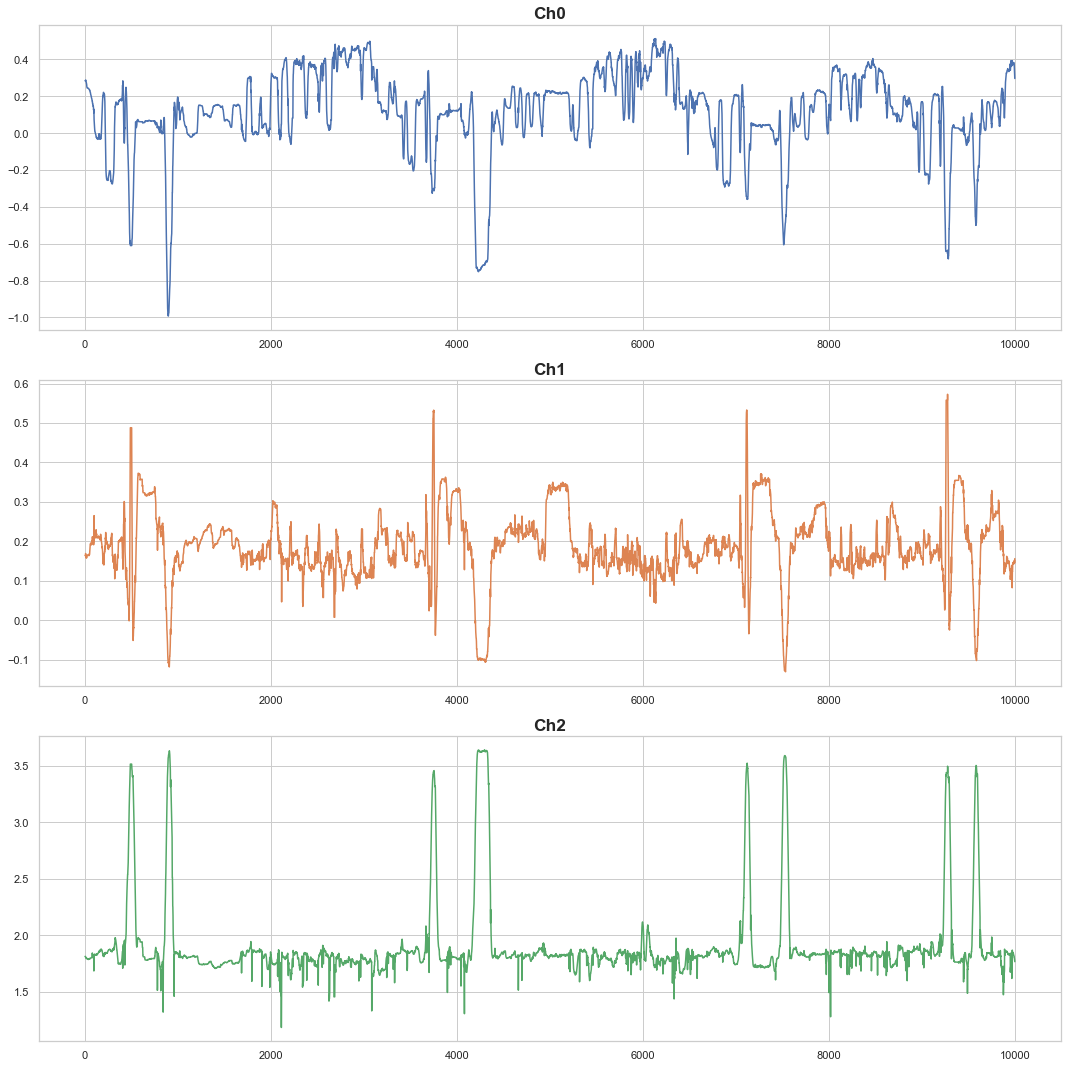

In [9]:
fig, ax = plt.subplots(3, 1, figsize=(15, 5*3))


for ch in range(3):
    ax0 = ax[ch]

    x = df_joint.values[10000:20000, ch] / 1000 # mm -> m
    ax0.plot(x, c=f"C{ch}")
    ax0.set_title(f"Ch{ch}", fontsize="x-large", fontweight="bold")

fig.tight_layout()
fig.show()

### 2-1: SPINE_NECK

In [10]:
joint = 3
cols = [
    f"J{joint:0=2}_P0", f"J{joint:0=2}_P1", f"J{joint:0=2}_P2",
    f"J{joint:0=2}_O1", f"J{joint:0=2}_O2", f"J{joint:0=2}_O3",
]


df_joint = df[cols].copy()
display(df_joint.head())

,J03_P0,J03_P1,J03_P2,J03_O1,J03_O2,J03_O3
0,47.7728,-92.7770,2206.83,-0.347083,0.462540,-0.491131
1,47.7728,-92.7770,2206.83,-0.347083,0.462540,-0.491131
2,47.6382,-94.4943,2208.81,-0.353120,0.462172,-0.492306
3,48.0137,-96.5068,2207.82,-0.351732,0.462817,-0.491736
4,50.0032,-101.9980,2203.35,-0.338826,0.463795,-0.480321


/var/folders/dm/z_k23pbx6y78kywxjbsfpm8c0000gn/T/ipykernel_96175/1473406786.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


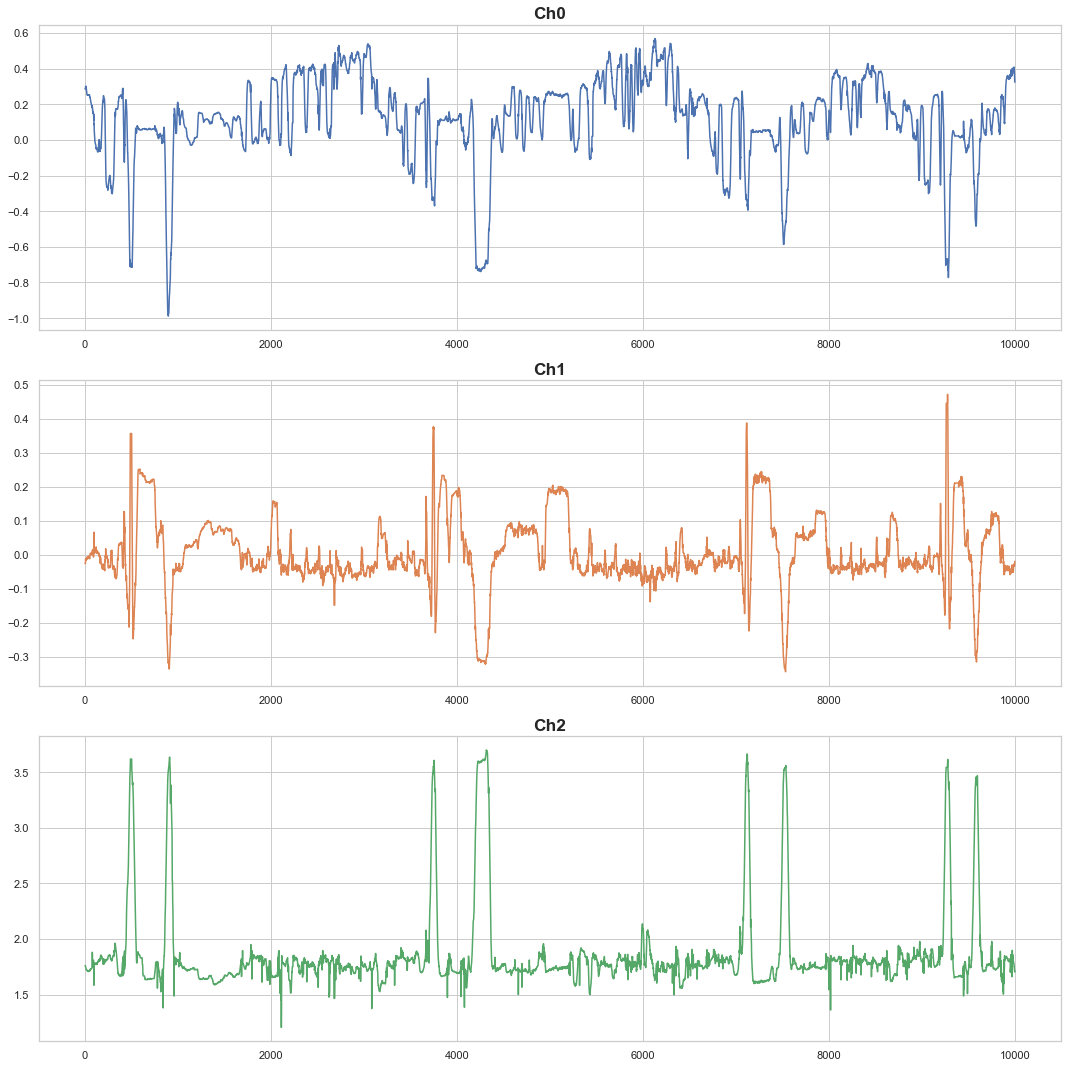

In [11]:
fig, ax = plt.subplots(3, 1, figsize=(15, 5*3))


for ch in range(3):
    ax0 = ax[ch]

    x = df_joint.values[10000:20000, ch] / 1000 # mm -> m
    ax0.plot(x, c=f"C{ch}")
    ax0.set_title(f"Ch{ch}", fontsize="x-large", fontweight="bold")

fig.tight_layout()
fig.show()